## **7PAM2015-0509-2024 -- Research Methods in Data Science**
### Group Kaggle Challenge on Spaceship Titanic -- Assignment-3
---
##### Spaceship Titanic Challenge link can be found [here](https://www.kaggle.com/competitions/spaceship-titanic/overview).

**Problem Statement:** When the Spaceship Titanic encountered a spacetime anomaly, some passengers were teleported to alternate dimensions while others remained aboard. Using passenger data including CryoSleep status, VIP services, cabin assignments, and spending patterns, develop a machine learning model to predict which passengers were transported.

**Data Columns description:** [Directly Taken from Kaggle Data Overview]

    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    Age - The age of the passenger.
    VIP - Whether the passenger has paid for special VIP service during the voyage.
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    Name - The first and last names of the passenger.
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
---
**Group-3**

- **Mohit Agarwal                 (Student ID-22031257)**
- **Jerome Paulraj                (Student ID-22074395)**
- **Omkar Shashikant Sawant       (Student ID-22080770)**
- **somy Nellikkunnel Thomas      (Student ID-22079522)**
- **Chandra Shekar Losirlu        (Student ID-22081216)**
- **Hari Bahadur Gharti Magar     (Student ID-22075765)**
- **Yogesh Pandit                 (Student ID-22095146)**

### Import Libraries

In [1]:
# libraries import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

### Setting Palette For Plotting

In [2]:
# setting style
sns.set_style("darkgrid")
# setting context
sns.set_context("paper")
# setting palette
sns.set_palette("deep", color_codes=True)

### Defining Paths

In [3]:
# note: change the paths
# data path
data_path = r"D:\MScDataScience\9.Research_Methods\Assignment\Assignment3\Spaceship_Titanic\Data"
# image save path
image_save_path = r"D:\MScDataScience\9.Research_Methods\Assignment\Assignment3\Spaceship_Titanic\Images"

### Loading Data

In [4]:
# reading the trian and test data
train_data = pd.read_csv(os.path.join(data_path, "train.csv"))
test_data = pd.read_csv(os.path.join(data_path, "test.csv"))

### Functions

Function to Calculate the Missingess

In [5]:
def missing_data(df, plot=False, title="Number of Missing Data"):
    """
    Generate a summary of missing values in the DataFrame and optionally plot them.

    Computes the count and percentage of missing values for each column in the given
    DataFrame. If requested, it also generates and saves a horizontal bar plot of the
    missing value distribution.

    Args:
        df (pandas.DataFrame): Input DataFrame to analyze for missing values.
        plot (bool): Whether to generate a bar plot of missing value counts. Default False.
        title (str): Title for the plot if plotting is enabled. Default "Number of Missing Data".

    Raises:
        ValueError: If `df` is not a valid pandas DataFrame.

    Note:
        To save plots, ensure a global variable `image_save_path` exists and points to
        a valid directory.
    """

    # validate input type
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")

    # combine missing value counts and percentages into a summary DataFrame
    missing_df = pd.concat([df.isna().sum(),
                            np.round(df.isna().mean()*100, 2)],  # type: ignore
                           axis=1,
                           # type: ignore
                           keys=["MissingCount", "MissingPercentage"])

    if plot:
        # create horizontal bar plot of missing counts
        missing_df["MissingCount"].plot(
            kind="barh",
            figsize=(10, 6))

        # format plot with bold title and grid
        plt.title(title, fontsize=12, fontweight="bold")
        plt.xlabel("Missing Counts", fontweight="bold")
        plt.ylabel("Columns", fontweight="bold")
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # save plot image if image_save_path exists in global scope
        if "image_save_path" in globals():
            plt.savefig(os.path.join(image_save_path,
                        f"{title}.png"), bbox_inches="tight")

        # display the plot
        plt.show()

    # print missing value summary table
    print(missing_df)

Function to Visualise the Missingess

In [6]:
def missing_data_visualisation(df, title="Training"):
    """
    Visualize missing data patterns in the DataFrame using missingno.

    Generates and saves three common missing data plots:
    1. Matrix visualization showing locations and patterns of missing values.
    2. Nullity correlation heatmap indicating correlation between missingness in columns.
    3. Dendrogram clustering columns by similarity of missing data patterns.

    Args:
        df (pandas.DataFrame): DataFrame to analyze for missing data.
        title (str): Title to use in plot titles and filenames. Default is "Training".

    Raises:
        FileNotFoundError: If global variable `image_save_path` is not set or 
        points to invalid directory.

    Note:
        Requires a global variable `image_save_path` where plots will be saved.
        Ensure necessary imports: matplotlib.pyplot, os, missingno.
    """

    # Check if image_save_path exists globally and is valid
    if 'image_save_path' not in globals() or not os.path.isdir(image_save_path):
        raise FileNotFoundError(
            "Global variable 'image_save_path' must be set to a valid directory path."
        )

    # Matrix plot: visualizes missingness as white lines on dark background
    msno.matrix(df, figsize=(12, 8), fontsize=12)
    plt.title(f"Matrix Visualisation of Missing Data in {title} Set",
              fontsize=16, fontweight="bold")
    plt.xlabel("Columns (Features)", fontsize=12, fontweight="bold")
    plt.ylabel("Rows (Samples)", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path,
                             f"Matrix Visualisation of Missing Data in {title} Set.png"),
                bbox_inches="tight")
    plt.show()

    # Nullity heatmap: shows correlations in missingness between pairs of columns
    msno.heatmap(df, figsize=(12, 8), fontsize=12)
    plt.title(f"Nullity Correlation Heatmap {title} Set",
              fontsize=16, fontweight="bold")
    plt.xlabel("Columns (Features)", fontsize=12, fontweight="bold")
    plt.ylabel("Columns (Features)", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path,
                             f"Nullity Correlation Heatmap {title} Set.png"), bbox_inches="tight")
    plt.show()

    # Dendrogram: hierarchical clustering of columns based on missingness pattern similarity
    msno.dendrogram(df, figsize=(12, 8), fontsize=12)
    plt.title(f"Dendrogram of Nullity Clusters for {title} Set",
              fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path,
                             f"Dendrogram of Nullity Clusters for {title} Set.png"), bbox_inches="tight")
    plt.show()

Function to Assign Age Groups

In [7]:
def assign_age_group(df):
    """
    Assigns age group labels to each row in the DataFrame based on the 'Age' column.

    The function creates a new column, 'AgeGroup', categorizing ages into defined groups:
    - 00–12 years
    - 13–17 years
    - 18–25 years
    - 26–30 years
    - 31–50 years
    - 51+ years

    Args:
        df (pandas.DataFrame): DataFrame containing an 'Age' column with numeric age values.

    Returns:
        pandas.DataFrame: DataFrame with an added 'AgeGroup' column specifying the age category for each row.

    Raises:
        KeyError: If 'Age' column is not present in the DataFrame.
        ValueError: If the 'Age' column contains non-numeric values.

    Note:
        This function uses fixed bins defined as:
        [-1, 12, 17, 25, 30, 50, np.inf]
        and corresponding labels:
        ['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+'].
    """

    # Check that 'Age' column exists in the DataFrame
    if 'Age' not in df.columns:
        raise KeyError("DataFrame must contain an 'Age' column.")

    # Assign age group labels based on specified bins and labels
    df['AgeGroup'] = pd.cut(
        df['Age'],
        # Define age ranges for the groups
        bins=[-1, 12, 17, 25, 30, 50, np.inf],
        labels=['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30',
                'Age_31-50', 'Age_51+']  # Assign readable labels
    )

    return df  # Return DataFrame with new 'Age_group' column

Function to Display Correlation Matrix 

In [43]:
def correlation_matrix_visualise(df, numerical_features, title):
    """
    Visualizes and returns the correlation matrix for selected numerical features.

    Generates a lower-triangle heatmap of the Pearson correlation coefficients between
    all specified numerical features in the provided DataFrame, annotating each cell with the correlation value.

    Args:
        df (pandas.DataFrame): The input DataFrame containing data to analyze.
        numerical_features (list of str): List of column names representing numerical features to include in the matrix.
        title (str): Title for the correlation heapmap.

    Returns:
        pandas.DataFrame: The computed correlation matrix of the selected numerical features.

    Raises:
        KeyError: If any of the specified numerical features are not present in the DataFrame.
        ValueError: If fewer than two numerical features are provided.

    Note:
        - Requires a global variable `image_save_path` set to a valid directory path for saving the plot.
        - The heatmap is saved as "Correlation Matrix - Numerical Features.png" in the designated path.
        - Uses a color map centered at 0 to highlight positive and negative correlations.
    """

    # Check that all specified features exist in the DataFrame
    missing_cols = [col for col in numerical_features if col not in df.columns]
    if missing_cols:
        raise KeyError(f"Columns not found in DataFrame: {missing_cols}")

    # At least two features are required for a correlation matrix
    if len(numerical_features) < 2:
        raise ValueError(
            "At least two numerical features are required to compute a correlation matrix.")

    # Compute the correlation matrix for the selected features
    correlation_matrix = df[numerical_features].corr()

    # Create a mask for the upper triangle of the matrix (including the diagonal)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 6))

    # Create the heatmap, showing only the lower triangle
    sns.heatmap(
        correlation_matrix,
        mask=mask,                      # Hide upper triangle
        annot=True,                     # Display correlation values in cells
        cmap="coolwarm",                # Diverging color palette
        center=0,                       # Color palette centered at zero
        square=True,                    # Force cells to be square
        fmt=".3f",                      # Format annotations to three decimals
        cbar_kws={"shrink": 0.8},       # Shrink colorbar
        annot_kws={"size": 10}          # Set annotation font size
    )

    # Set a descriptive title and axis label formatting
    plt.title(title,
              fontsize=16, fontweight="bold")
    plt.xticks(rotation=45, ha="right")  # Improve x-label readability
    plt.yticks(rotation=0)               # Keep y-labels horizontal

    plt.tight_layout()  # Prevent label/element overlap

    # Save figure to the designated folder
    plt.savefig(os.path.join(image_save_path,
                f"{title}.png"), bbox_inches="tight")
    plt.show()

    return correlation_matrix

### Basic Infomation on Datasets

In [8]:
# looking at the shape of the datas
print(
    f"[INFO] Train Data Shape: {train_data.shape[0]} rows x {train_data.shape[1]} columns")
print(
    f"[INFO] Test Data Shape: {test_data.shape[0]} rows x {test_data.shape[1]} columns")

[INFO] Train Data Shape: 8693 rows x 14 columns
[INFO] Test Data Shape: 4277 rows x 13 columns


#### Train Dataset

In [9]:
# column type information -- trian
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
# describing the train data for all the columns
train_data.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Anton Woody,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [11]:
# describing the train data for the object columns
train_data.describe(include="object").round().T  # type: ignore

,count,unique,top,freq
PassengerId,8693,8693,9280_02,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Anton Woody,2


In [12]:
# describing the train data for the numerical columns
train_data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,29.0,14.0,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,225.0,667.0,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.0,1611.0,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,174.0,605.0,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.0,1137.0,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,305.0,1146.0,0.0,0.0,0.0,46.0,24133.0


In [13]:
# looking at the data -- train
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
# looking at the missing values in train
missing_data(train_data)

              MissingCount  MissingPercentage
PassengerId              0               0.00
HomePlanet             201               2.31
CryoSleep              217               2.50
Cabin                  199               2.29
Destination            182               2.09
Age                    179               2.06
VIP                    203               2.34
RoomService            181               2.08
FoodCourt              183               2.11
ShoppingMall           208               2.39
Spa                    183               2.11
VRDeck                 188               2.16
Name                   200               2.30
Transported              0               0.00


#### Test Dataset

In [15]:
# column type information -- test
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [16]:
# describing the train data for all the columns
test_data.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,9277_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Lyney Sellahaney
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


In [17]:
# describing the train data for the object columns
test_data.describe(include="object").round().T  # type: ignore

,count,unique,top,freq
PassengerId,4277,4277,9277_01,1
HomePlanet,4190,3,Earth,2263
CryoSleep,4184,2,False,2640
Cabin,4177,3265,G/160/P,8
Destination,4185,3,TRAPPIST-1e,2956
VIP,4184,2,False,4110
Name,4183,4176,Lyney Sellahaney,2


In [18]:
# describing the test data for the numerical columns
test_data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,29.0,14.0,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.0,607.0,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.0,1528.0,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.0,561.0,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.0,1117.0,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,311.0,1247.0,0.0,0.0,0.0,36.0,22272.0


In [19]:
# looking at the data -- test
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [20]:
# looking at the missing values in test
missing_data(test_data)

              MissingCount  MissingPercentage
PassengerId              0               0.00
HomePlanet              87               2.03
CryoSleep               93               2.17
Cabin                  100               2.34
Destination             92               2.15
Age                     91               2.13
VIP                     93               2.17
RoomService             82               1.92
FoodCourt              106               2.48
ShoppingMall            98               2.29
Spa                    101               2.36
VRDeck                  80               1.87
Name                    94               2.20


### Exploratory Data Analysis

#### Missing Values Visualisation

##### Train Dataset

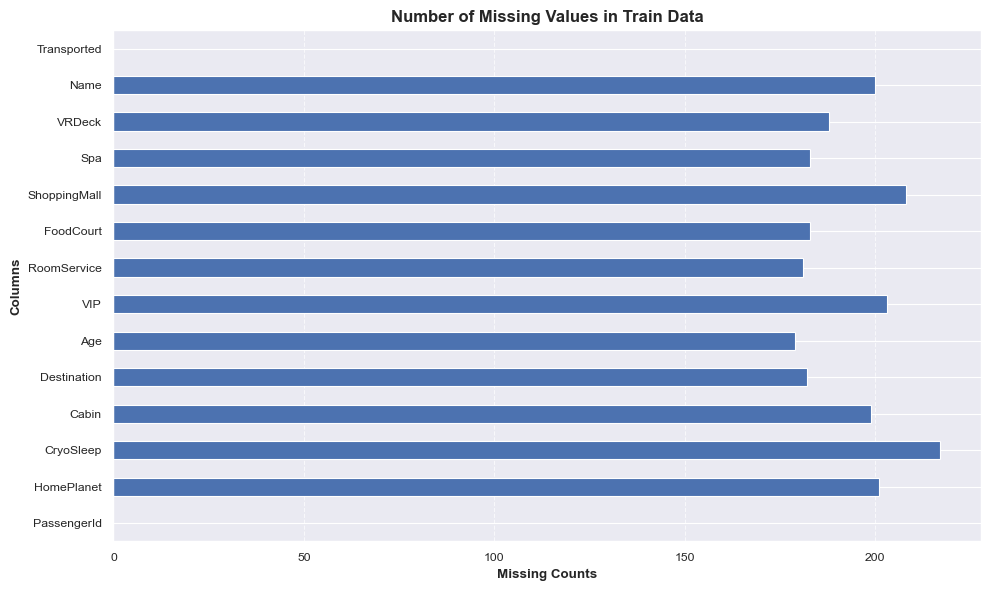

              MissingCount  MissingPercentage
PassengerId              0               0.00
HomePlanet             201               2.31
CryoSleep              217               2.50
Cabin                  199               2.29
Destination            182               2.09
Age                    179               2.06
VIP                    203               2.34
RoomService            181               2.08
FoodCourt              183               2.11
ShoppingMall           208               2.39
Spa                    183               2.11
VRDeck                 188               2.16
Name                   200               2.30
Transported              0               0.00


In [21]:
# missing values on train data
missing_data(train_data, plot=True,
             title="Number of Missing Values in Train Data")

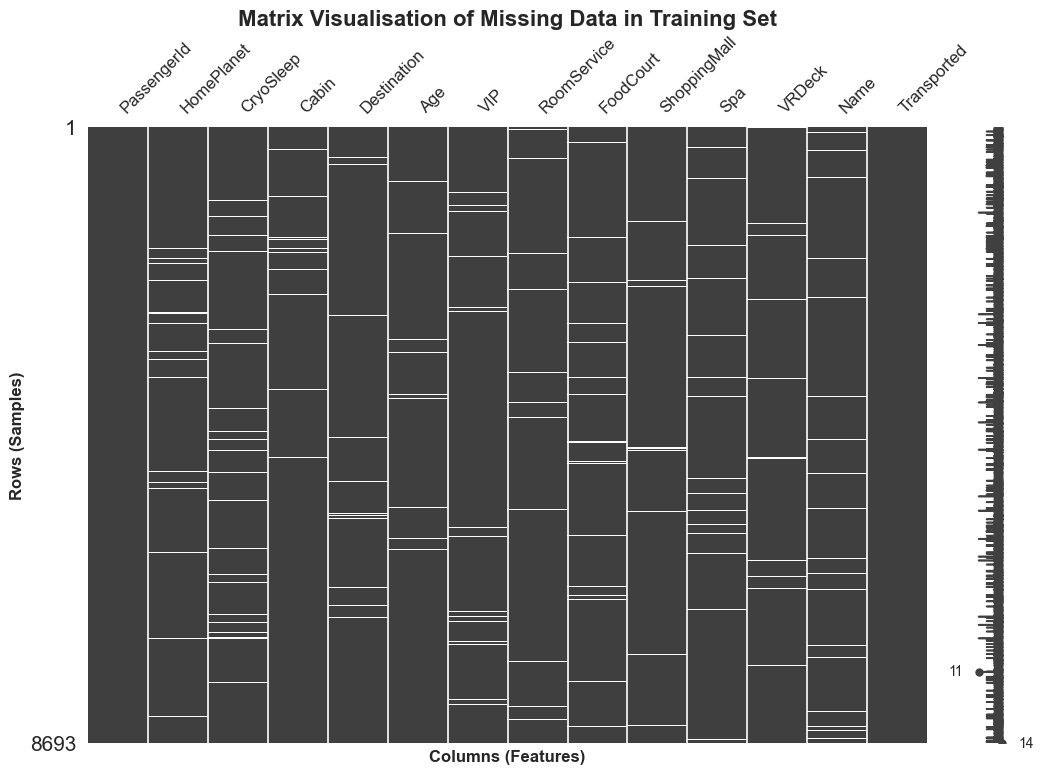

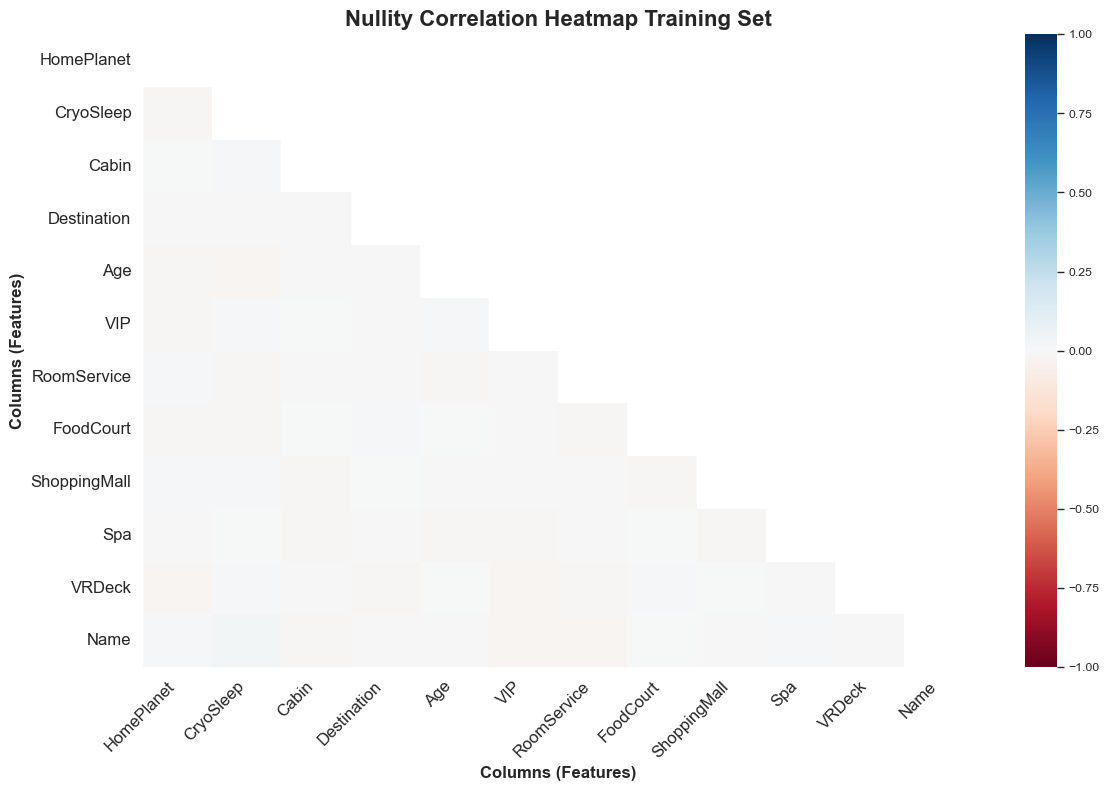

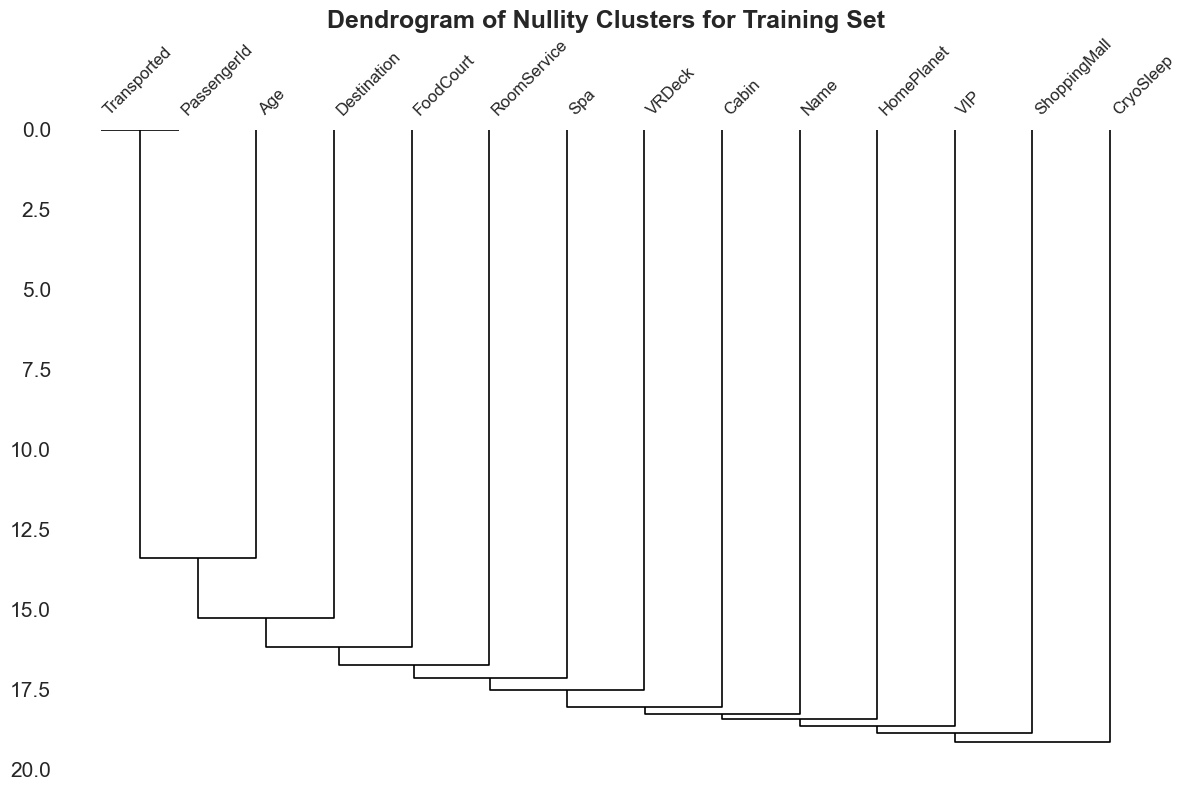

In [22]:
# visualising the missing data
missing_data_visualisation(train_data)

**Image-1: Matrix Visualisation of Missing Data in Training Set**
- **Systematic missingness:** Several features show consistent missing data patterns across rows
- Age appears to have substantial missing values
- CryoSleep and Cabin also show notable gaps
- The white lines indicate missing values, and their patterns suggest the missingness might not be completely random

**Image-2: Nullity Correlation Heatmap Training Set**
- Very weak correlations overall - most values appear close to 0 (light colors)
- No strong positive or negative correlations between features
- This suggests the features are largely independent, which could be good for modeling but might indicate limited predictive relationships
- The uniform light coloring indicates need for feature engineering to create more meaningful relationships

**Image-3: Dendrogram of Nullity Clusters for Training Set**
- **Left cluster:** Transported, PassengerId, Age, Destination - possibly demographic/booking info
- **Middle cluster:** FoodCourt, RoomService, Spa, VRDeck - clearly the amenity spending features
- **Right cluster:** Cabin, Name, HomePlanet, VIP, ShoppingMall, CryoSleep - mixed passenger characteristics

##### Test Dataset

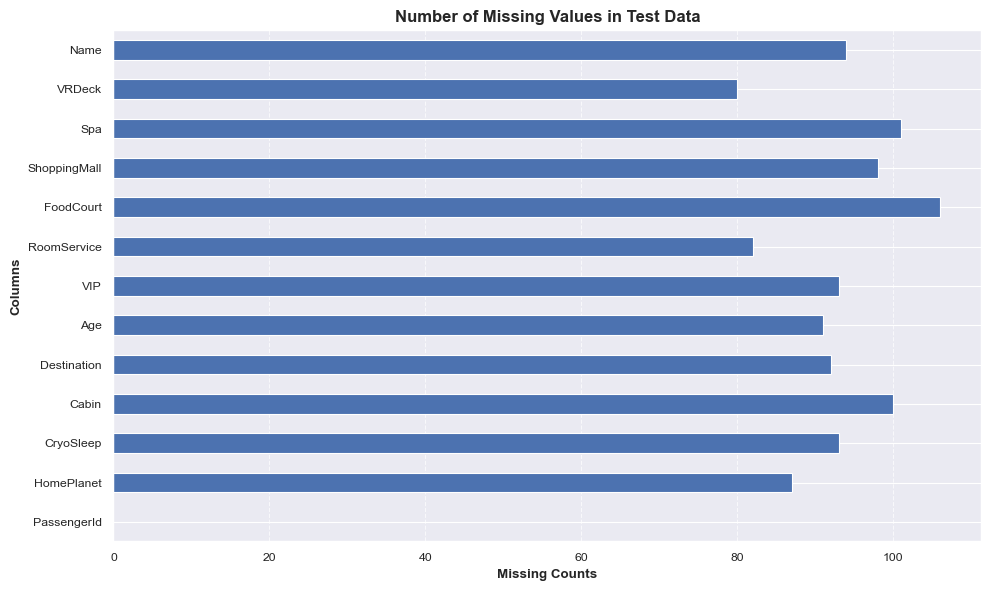

              MissingCount  MissingPercentage
PassengerId              0               0.00
HomePlanet              87               2.03
CryoSleep               93               2.17
Cabin                  100               2.34
Destination             92               2.15
Age                     91               2.13
VIP                     93               2.17
RoomService             82               1.92
FoodCourt              106               2.48
ShoppingMall            98               2.29
Spa                    101               2.36
VRDeck                  80               1.87
Name                    94               2.20


In [23]:
# missing values on train data
missing_data(test_data, plot=True,
             title="Number of Missing Values in Test Data")

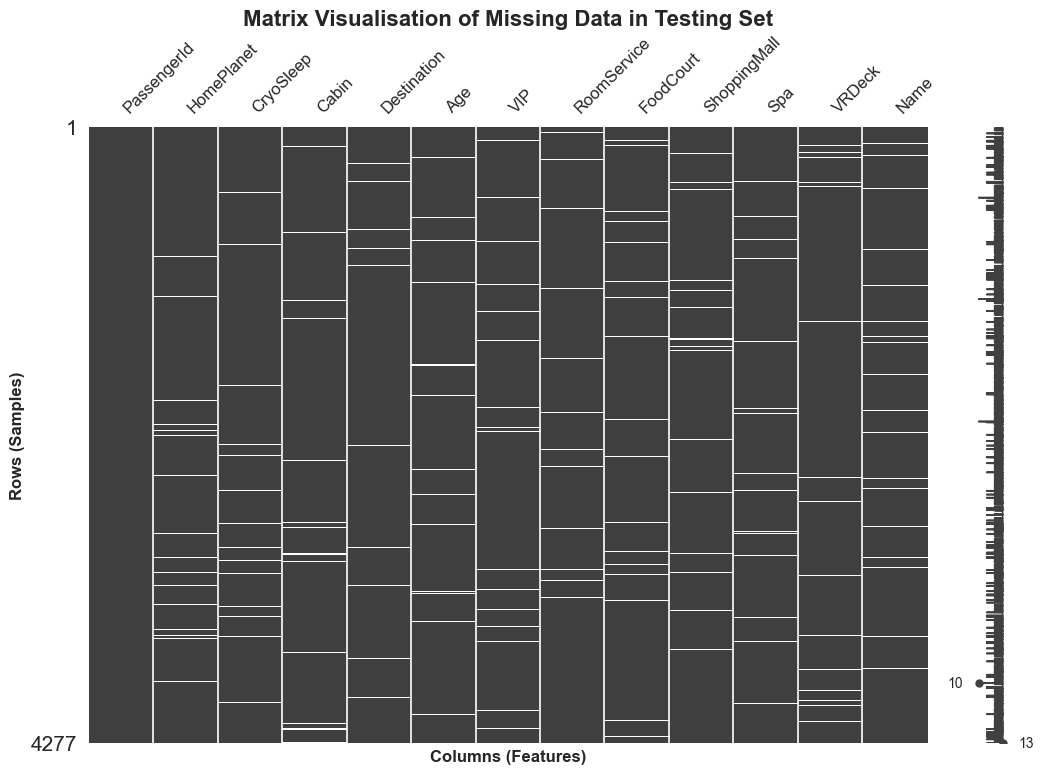

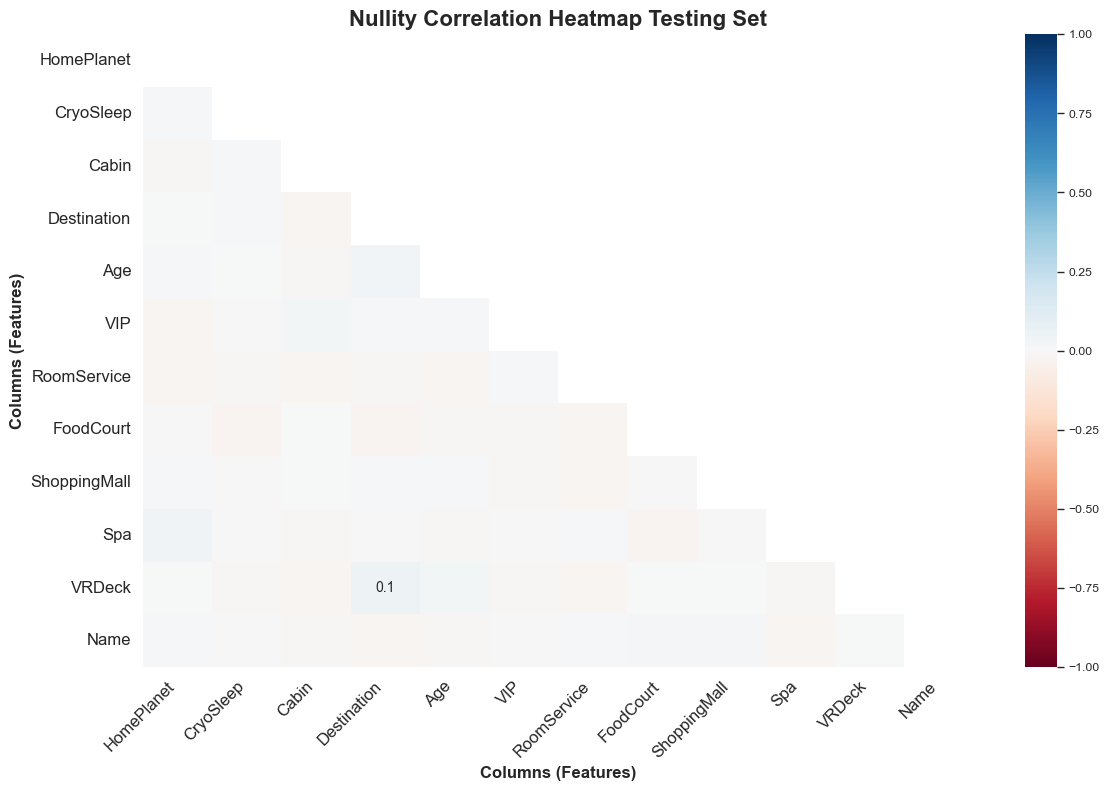

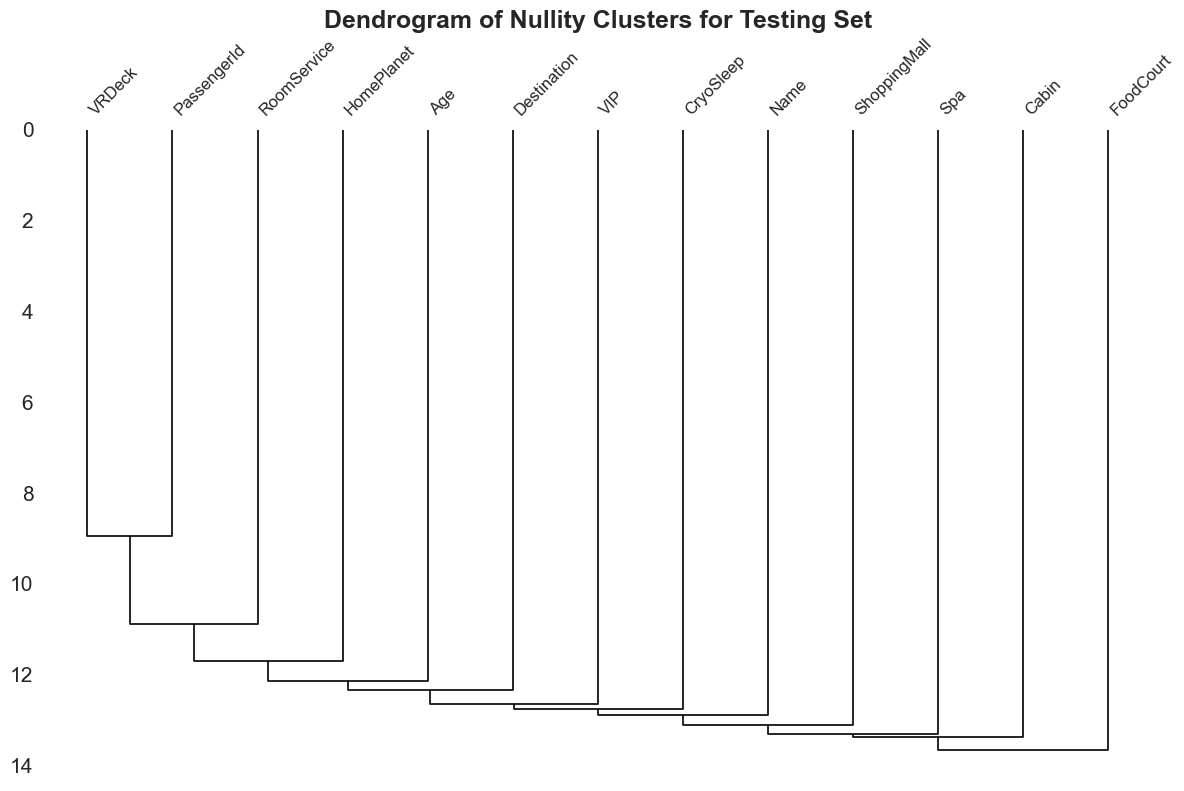

In [24]:
# visualising the missing data
missing_data_visualisation(test_data, title="Testing")

**Image-1: Matrix Visualisation of Missing Data in Testing Set**
- Overall missing data distribution appears consistent
- The missing data patterns in the test set closely mirror those in the training set, which is good for model generalization, meaning imputation strategies developed on training data should work well on test set.

**Image-2: Nullity Correlation Heatmap Testing Set**
- **Slightly stronger correlations visible:** The test set shows some slightly more pronounced relationships (though still weak overall)
- VRDeck shows a visible correlation value (0.1) with Destination - which wasn't as apparent in the training set
- Overall pattern consistency: The general weak correlation structure remains the same

**Image-3: Dendrogram of Nullity Clusters for Testing Set**
- **Different dendrogram structure:** The test set shows a completely different hierarchical clustering pattern
- **New groupings emerge:**
    - VRDeck now clusters separately at the left
    - Passenger demographic features (PassengerId, RoomService, HomePlanet, Age, Destination, VIP) form a large middle cluster
    - Amenity features (CryoSleep, Name, ShoppingMall, Spa, Cabin, FoodCourt) cluster on the right

NOTE: Models which can handle slight distribution shifts should be utilized for training, as the test and train data seems have different clustering patterns.

#### Class Balance Analysis

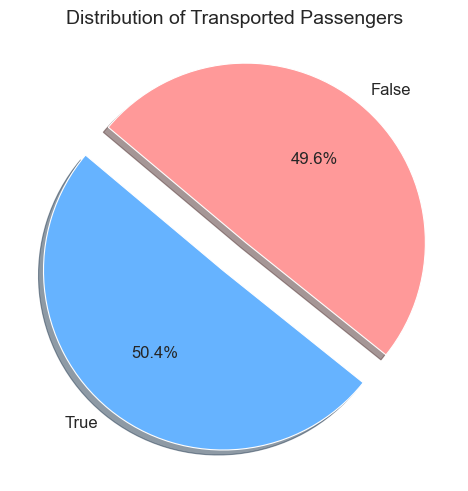

In [25]:
# Define plot style
fig, ax = plt.subplots(figsize=(5, 5))
colors = ["#66b3ff", "#ff9999"]

# Plot pie chart
train_data["Transported"].value_counts().plot.pie(
    explode=(0.1, 0.1),
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    colors=colors,
    textprops={"fontsize": 12},
    ax=ax
)  # type: ignore

ax.set_ylabel("")
ax.set_title("Distribution of Transported Passengers", fontsize=14)
plt.tight_layout()
plt.show()

- **Nearly perfect balance:**
    - Transported -- True: 50.4%
    - Transported -- False: 49.6%
- Standard accuracy metrics are reliable - precisions, recall, and f1-score will be meaningful
- Stable model training 
- Consistent cross-validation results - balanced spilt will maintain this distribution
- **Evaluation Strategy:**
    - Standard train/validation/test splits can be used without worrying about stratification
    - ROC-AUC will be a particularly good metric given the balanced classes
    - Confusion matrices will be easily interpretable

#### Column Extraction Based on Datatype

In [26]:
# getting the numerical columns
numerical_features = train_data.select_dtypes(
    include=[np.number]).columns.tolist()
# getting the categorial columns
categorical_features = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
# getting the qualitative columns
qualitative_features = ["PassengerId", "Cabin", "Name"]

#### Numerical Features Analysis

##### Features Distribution

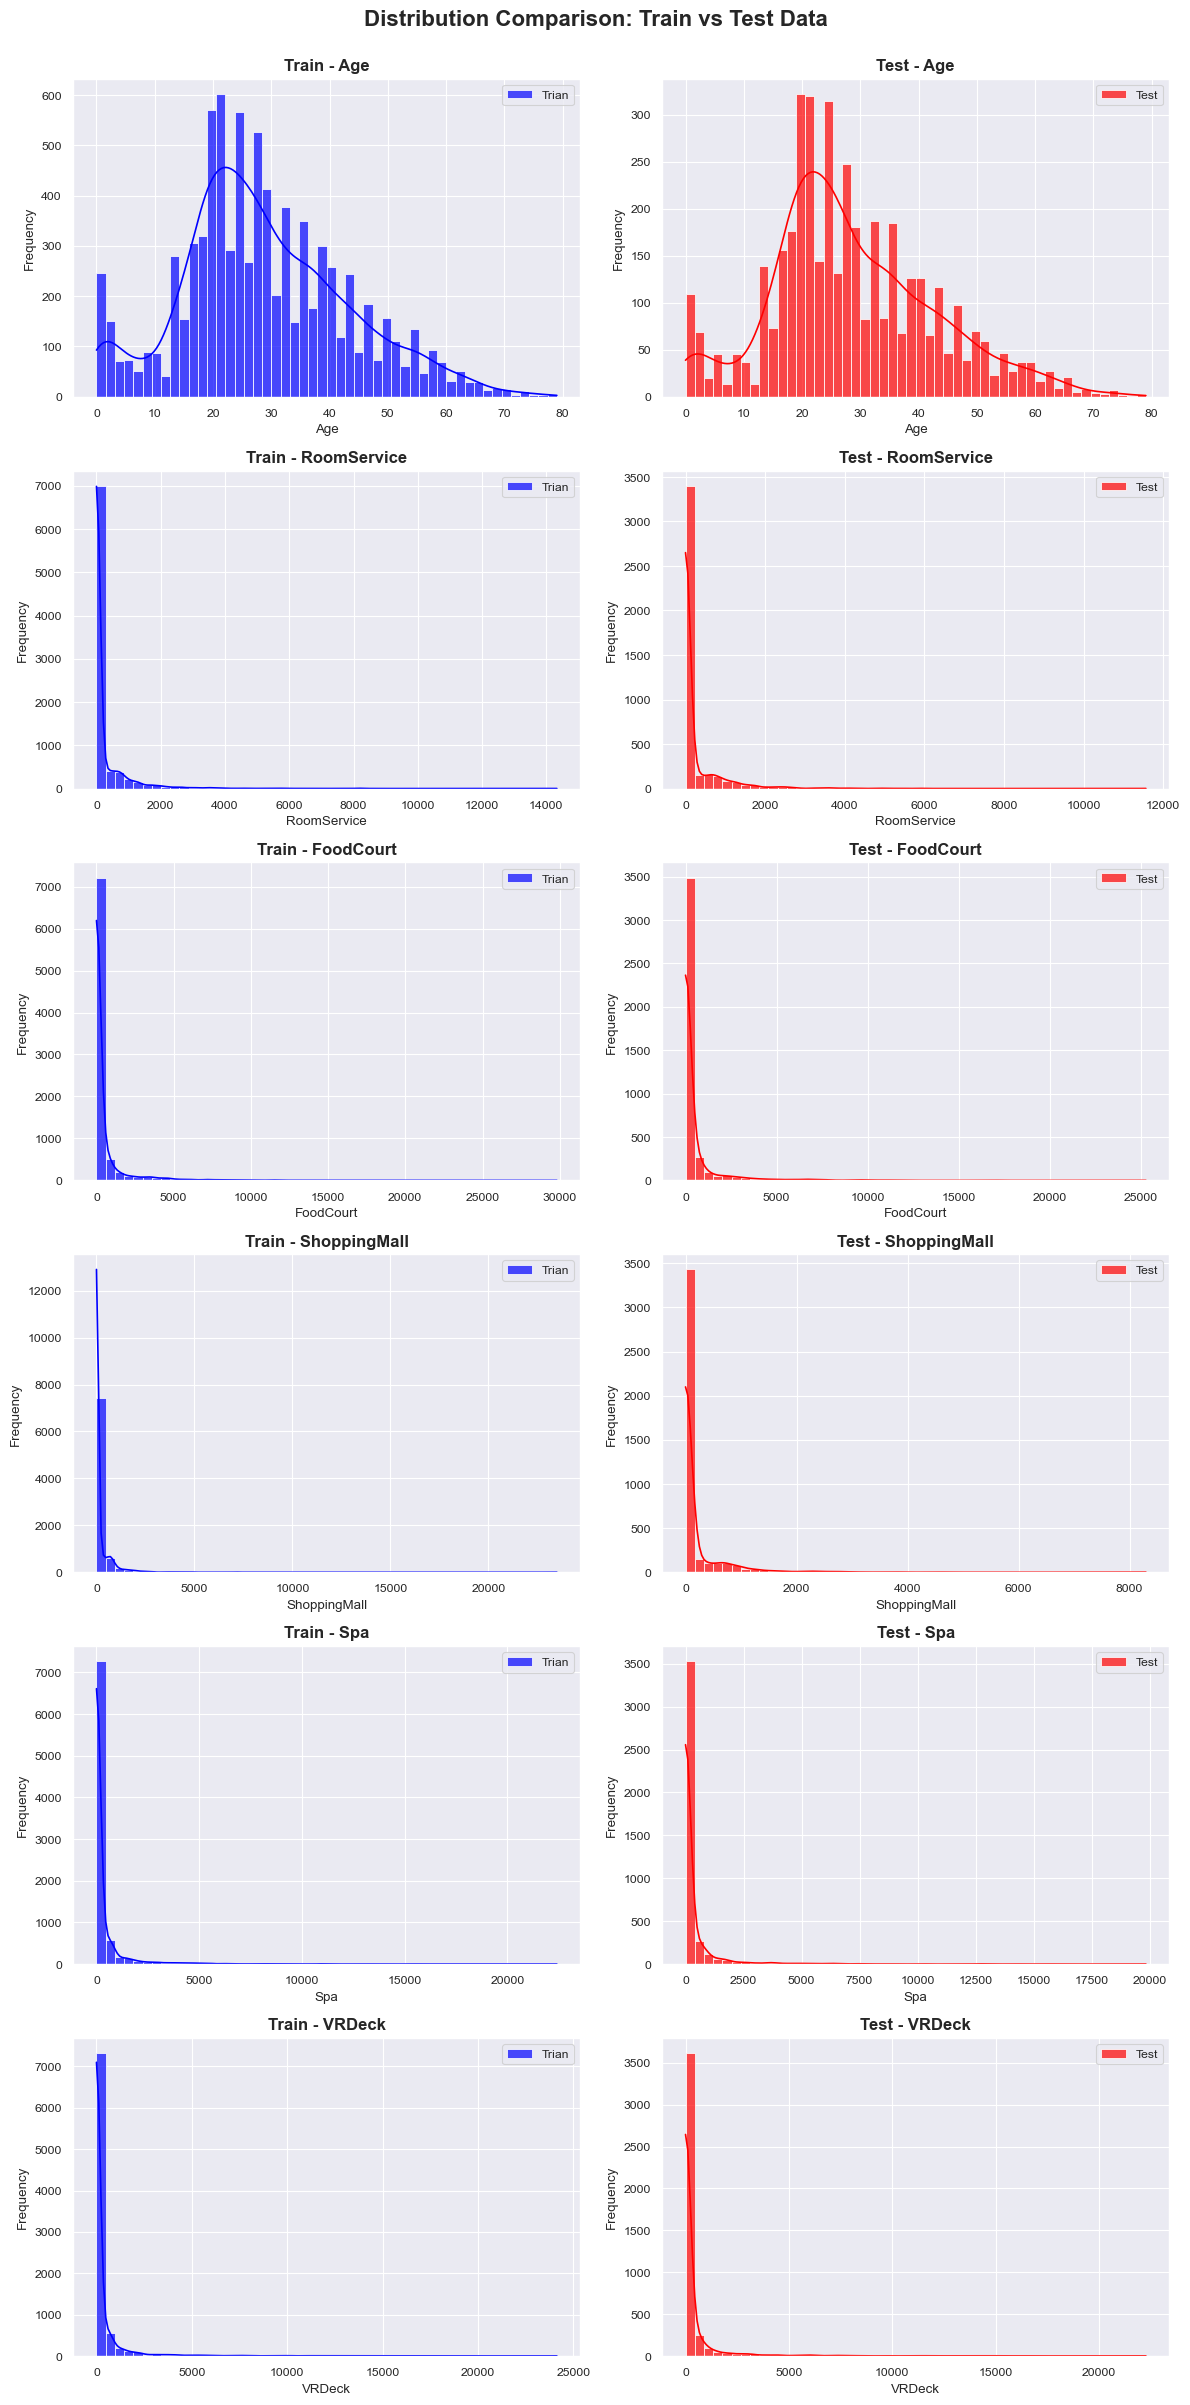

In [27]:
# Create subplots: rows = number of numerical features, 2 columns (train/test)
fig, axs = plt.subplots(len(numerical_features), 2,
                        figsize=(12, 4*len(numerical_features)))

# Loop through each numerical feature to create distribution plots
for i, col in enumerate(numerical_features):
    # Train plot (left column) - histogram with kde overlay
    sns.histplot(data=train_data, x=col, kde=True, ax=axs[i, 0],
                 color="blue", alpha=0.7, bins=50, label="Trian")
    axs[i, 0].set_title(f"Train - {col}", fontweight="bold", fontsize=12)
    axs[i, 0].set_ylabel("Frequency")
    axs[i, 0].legend()

    # Test plot (right column) - histogram with kde overlay
    sns.histplot(data=test_data, x=col, kde=True, ax=axs[i, 1],
                 color="red", alpha=0.7, bins=50, label="Test")
    axs[i, 1].set_title(f"Test - {col}", fontweight="bold", fontsize=12)
    axs[i, 1].set_ylabel("Frequency")
    axs[i, 1].legend()
# Add overall title to the figure
fig.suptitle("Distribution Comparison: Train vs Test Data",
             fontsize=16, fontweight="bold", y=1)
plt.tight_layout()
plt.savefig(os.path.join(image_save_path,
            "Distribution Comparison Train vs Test Data.png"), bbox_inches="tight")
plt.show()

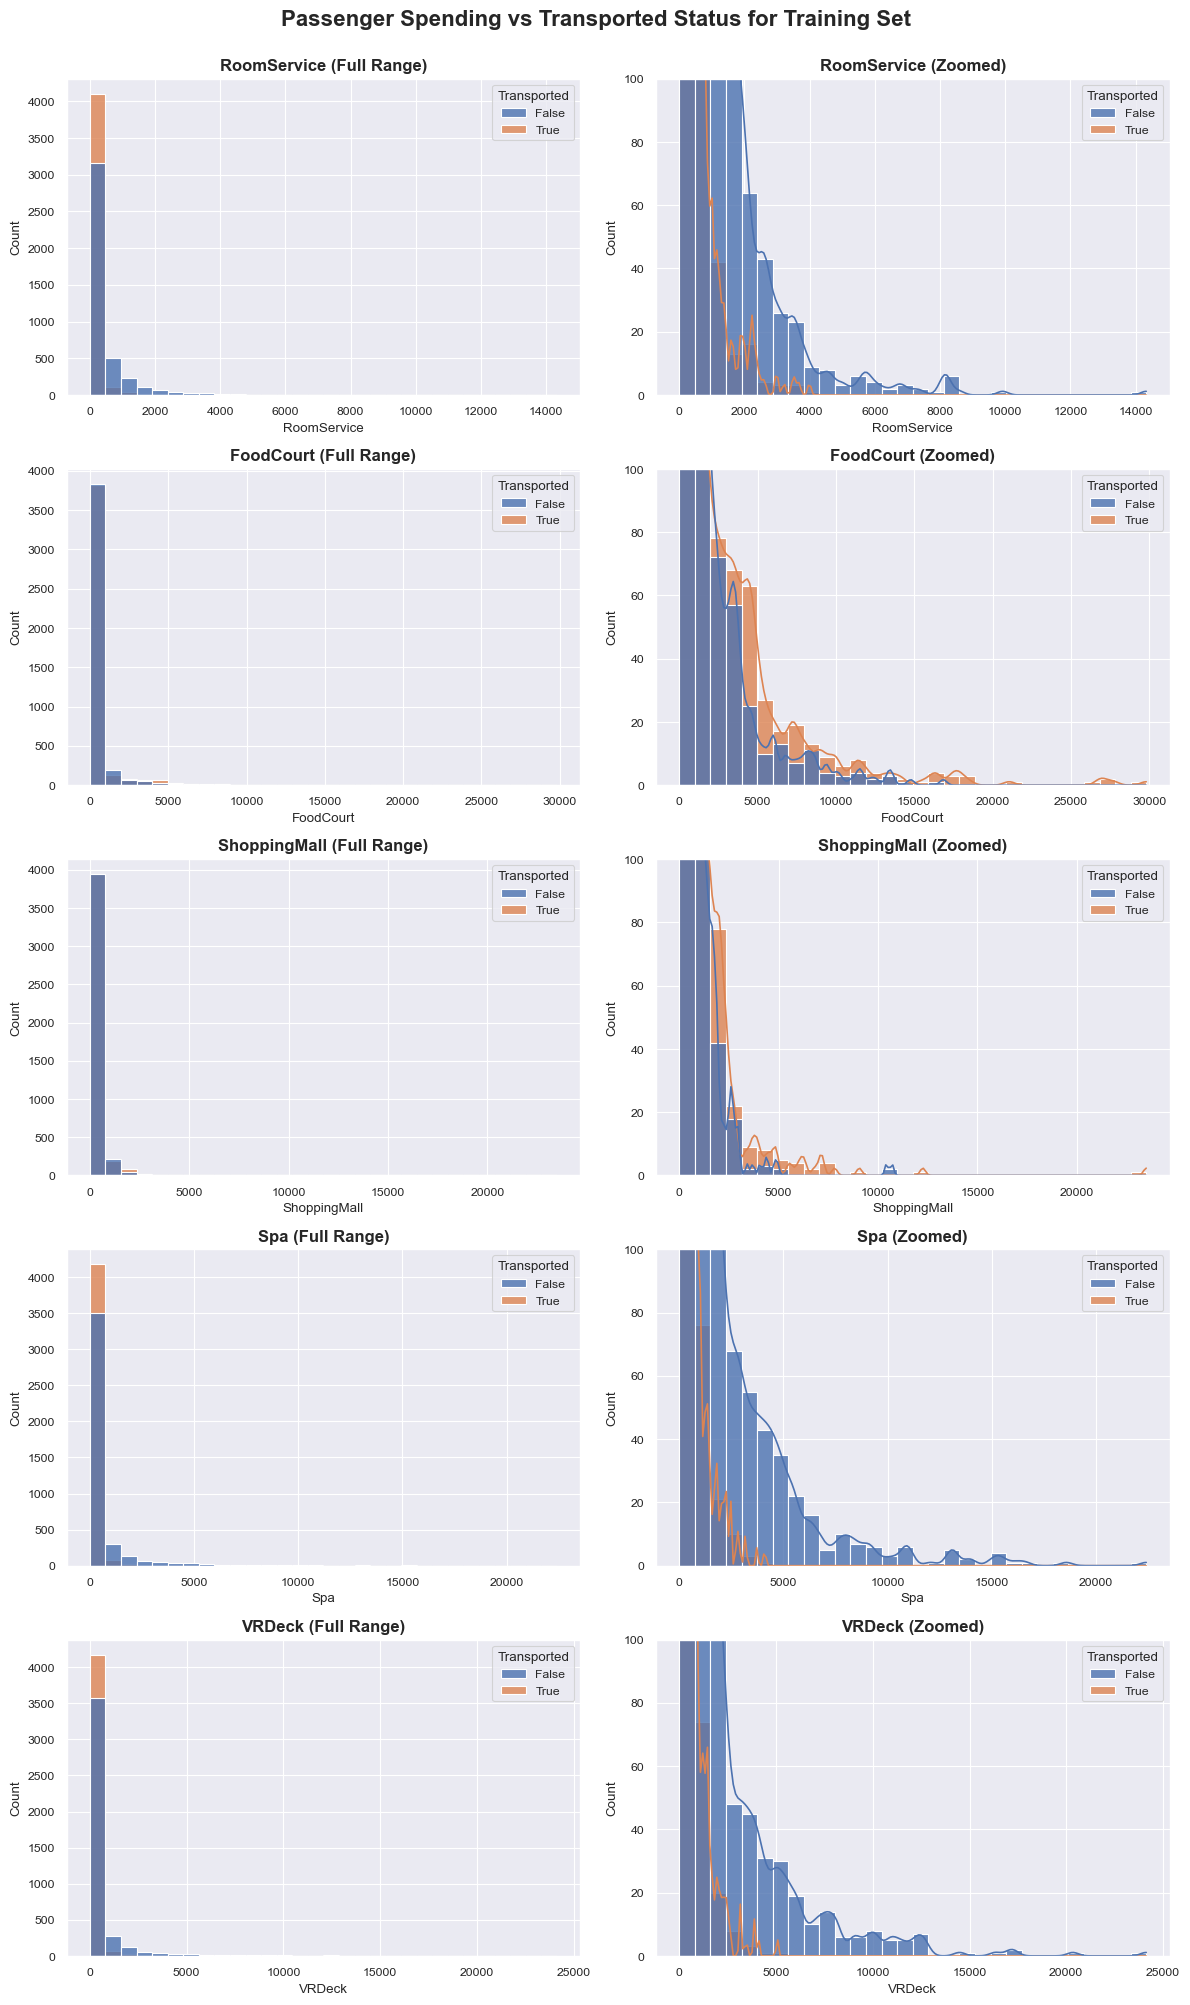

In [28]:
# Define expenditure-related columns
spending_features = ['RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck']

# Create figure
fig, axes = plt.subplots(nrows=len(spending_features),
                         ncols=2, figsize=(12, 20))
fig.suptitle("Passenger Spending vs Transported Status for Training Set",
             fontsize=16, fontweight="bold", y=1)

# Loop over each feature
for idx, feature in enumerate(spending_features):
    # Left: full distribution
    sns.histplot(
        data=train_data,
        x=feature,
        hue='Transported',
        ax=axes[idx, 0],
        bins=30,
        kde=False,
        alpha=0.8
    )
    axes[idx, 0].set_title(f"{feature} (Full Range)",
                           fontsize=12, fontweight="bold")

    # Right: zoomed-in distribution
    sns.histplot(
        data=train_data,
        x=feature,
        hue='Transported',
        ax=axes[idx, 1],
        bins=30,
        kde=True,
        alpha=0.8
    )
    axes[idx, 1].set_ylim(0, 100)
    axes[idx, 1].set_title(f"{feature} (Zoomed)",
                           fontsize=12, fontweight="bold")

plt.tight_layout()
plt.savefig(os.path.join(image_save_path,
                         "Passenger Spending vs Transported Status for Training Set.png"),
            bbox_inches="tight")
plt.show()

**Key Observations** [From both the Graphs]
- **Age Distribution:**
    - Both datasets show similar patterns: Normal-like distribution with peak around 25-30 years
    - Good consistency: Train and test distributions are well-aligned
    - Range: Both span 0-80 years with similar frequency patterns
    - Positive sign: No significant distribution shift between train/test
- **Spending Features (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck):**
    - Highly right-skewed: All show extreme concentration at zero
    - Zero-inflation problem: Vast majority of passengers spend $0 on these amenities
    - Long tail: Few passengers with high spending create extreme outliers
    - Consistent pattern: All spending features follow similar distributions

##### Outlier Detection

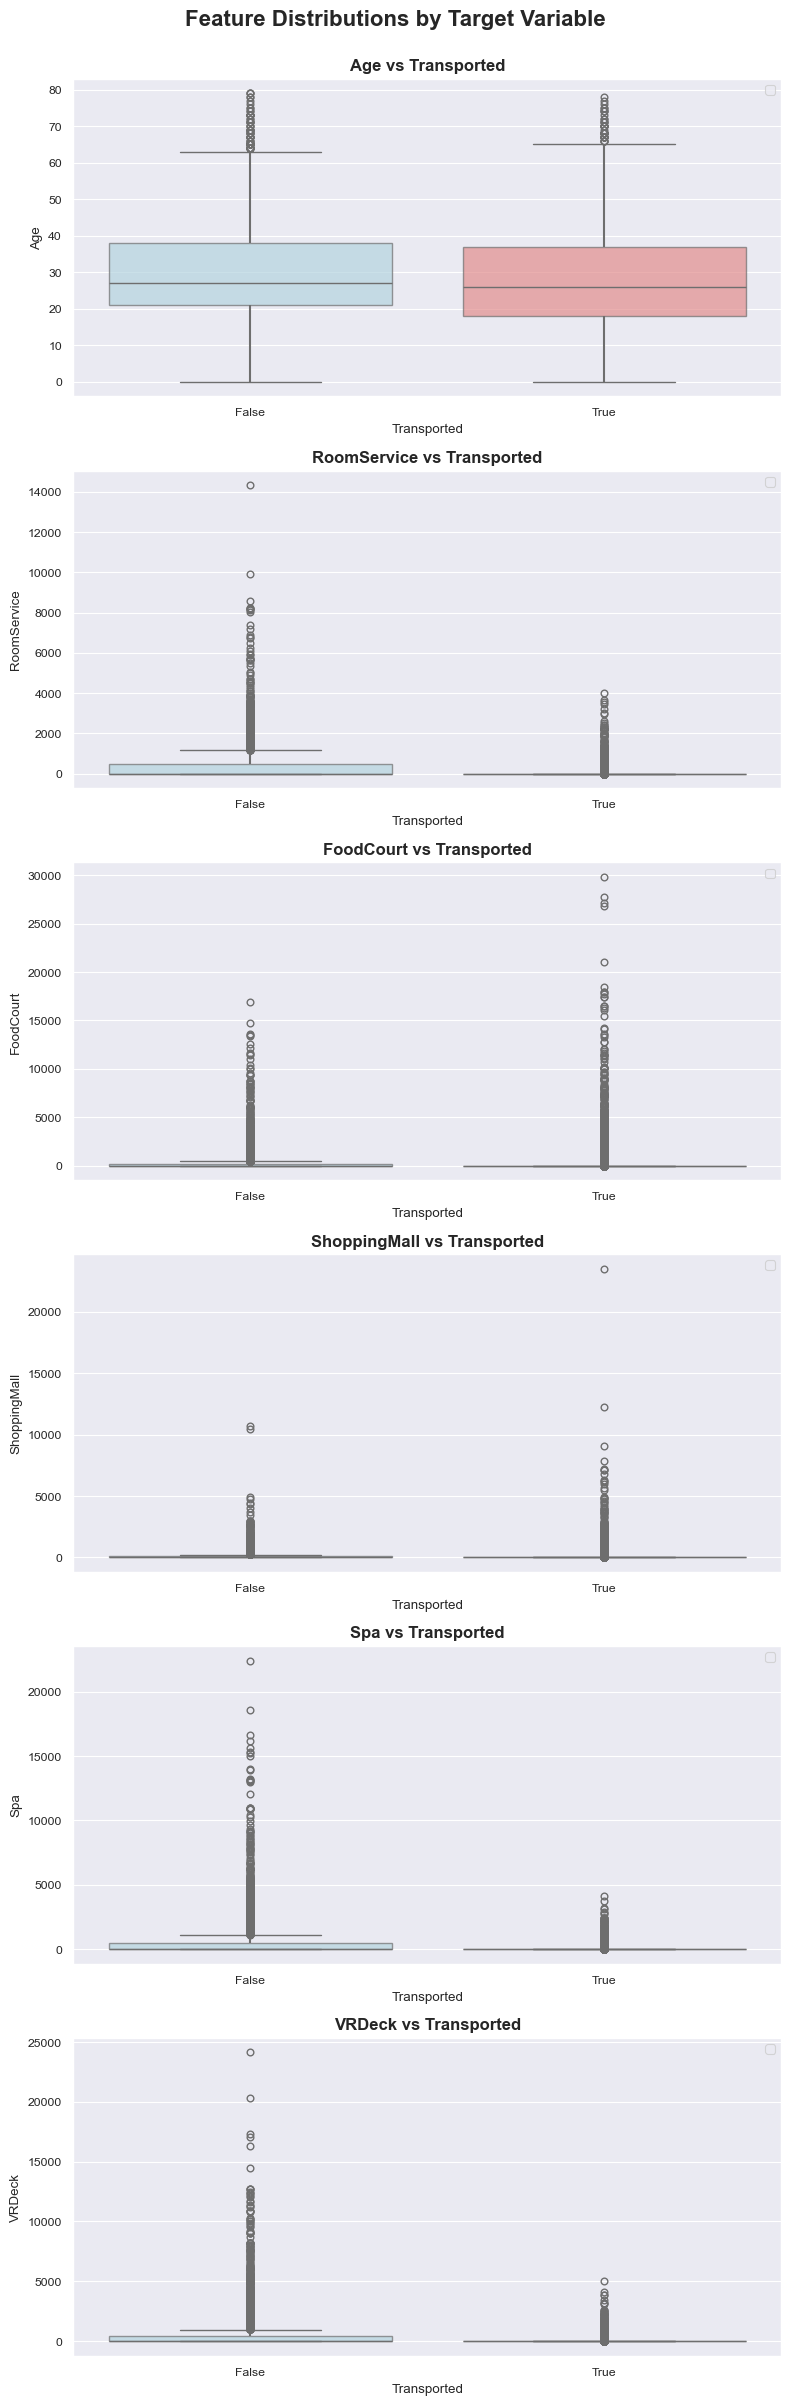

In [29]:
# Create subplots: rows = number of numerical features, 1 columns
fig, axs = plt.subplots(len(numerical_features), 1,
                        figsize=(8, 4*len(numerical_features)))

# Loop through each numerical feature to create distribution plots
for i, col in enumerate(numerical_features):
    # Create boxplot with the numerical col and transported
    sns.boxplot(data=train_data, x="Transported", y=col, ax=axs[i],
                palette=["lightblue", "lightcoral"],
                boxprops={"alpha": 0.7},
                whiskerprops={"linewidth": 1.5})
    axs[i].set_title(f"{col} vs Transported", fontweight="bold", fontsize=12)
    axs[i].legend()

# Add overall title to the figure
fig.suptitle("Feature Distributions by Target Variable",
             fontsize=16, fontweight="bold", y=1)
plt.tight_layout()
plt.savefig(os.path.join(image_save_path,
                         "Feature Distributions by Target Variable.png"), bbox_inches="tight")
plt.show()

**Key Observations:**
- **Age Distribution**
    - Very similar distributions between transported and non-transported passengers
    - Both groups have median ages around 27-30 years
    - Similar interquartile ranges and outlier patterns
    - Age appears to have minimal predictive power for transportation outcome

- **Spending Features (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)**
    - All spending features show a consistent and striking pattern:
    - **Non-Transported (False) passengers:**
        - Extremely high spending across all amenities
        - Multiple high-value outliers
        - Higher median spending in all categories
        - Wide distribution of spending amounts

    - **Transported (True) passengers:**
        - Minimal to zero spending across all amenities
        - Very low medians
        - Few outliers, and when present, much lower values
        - Highly concentrated near zero spending

##### Feature Interactions by Transportation Status

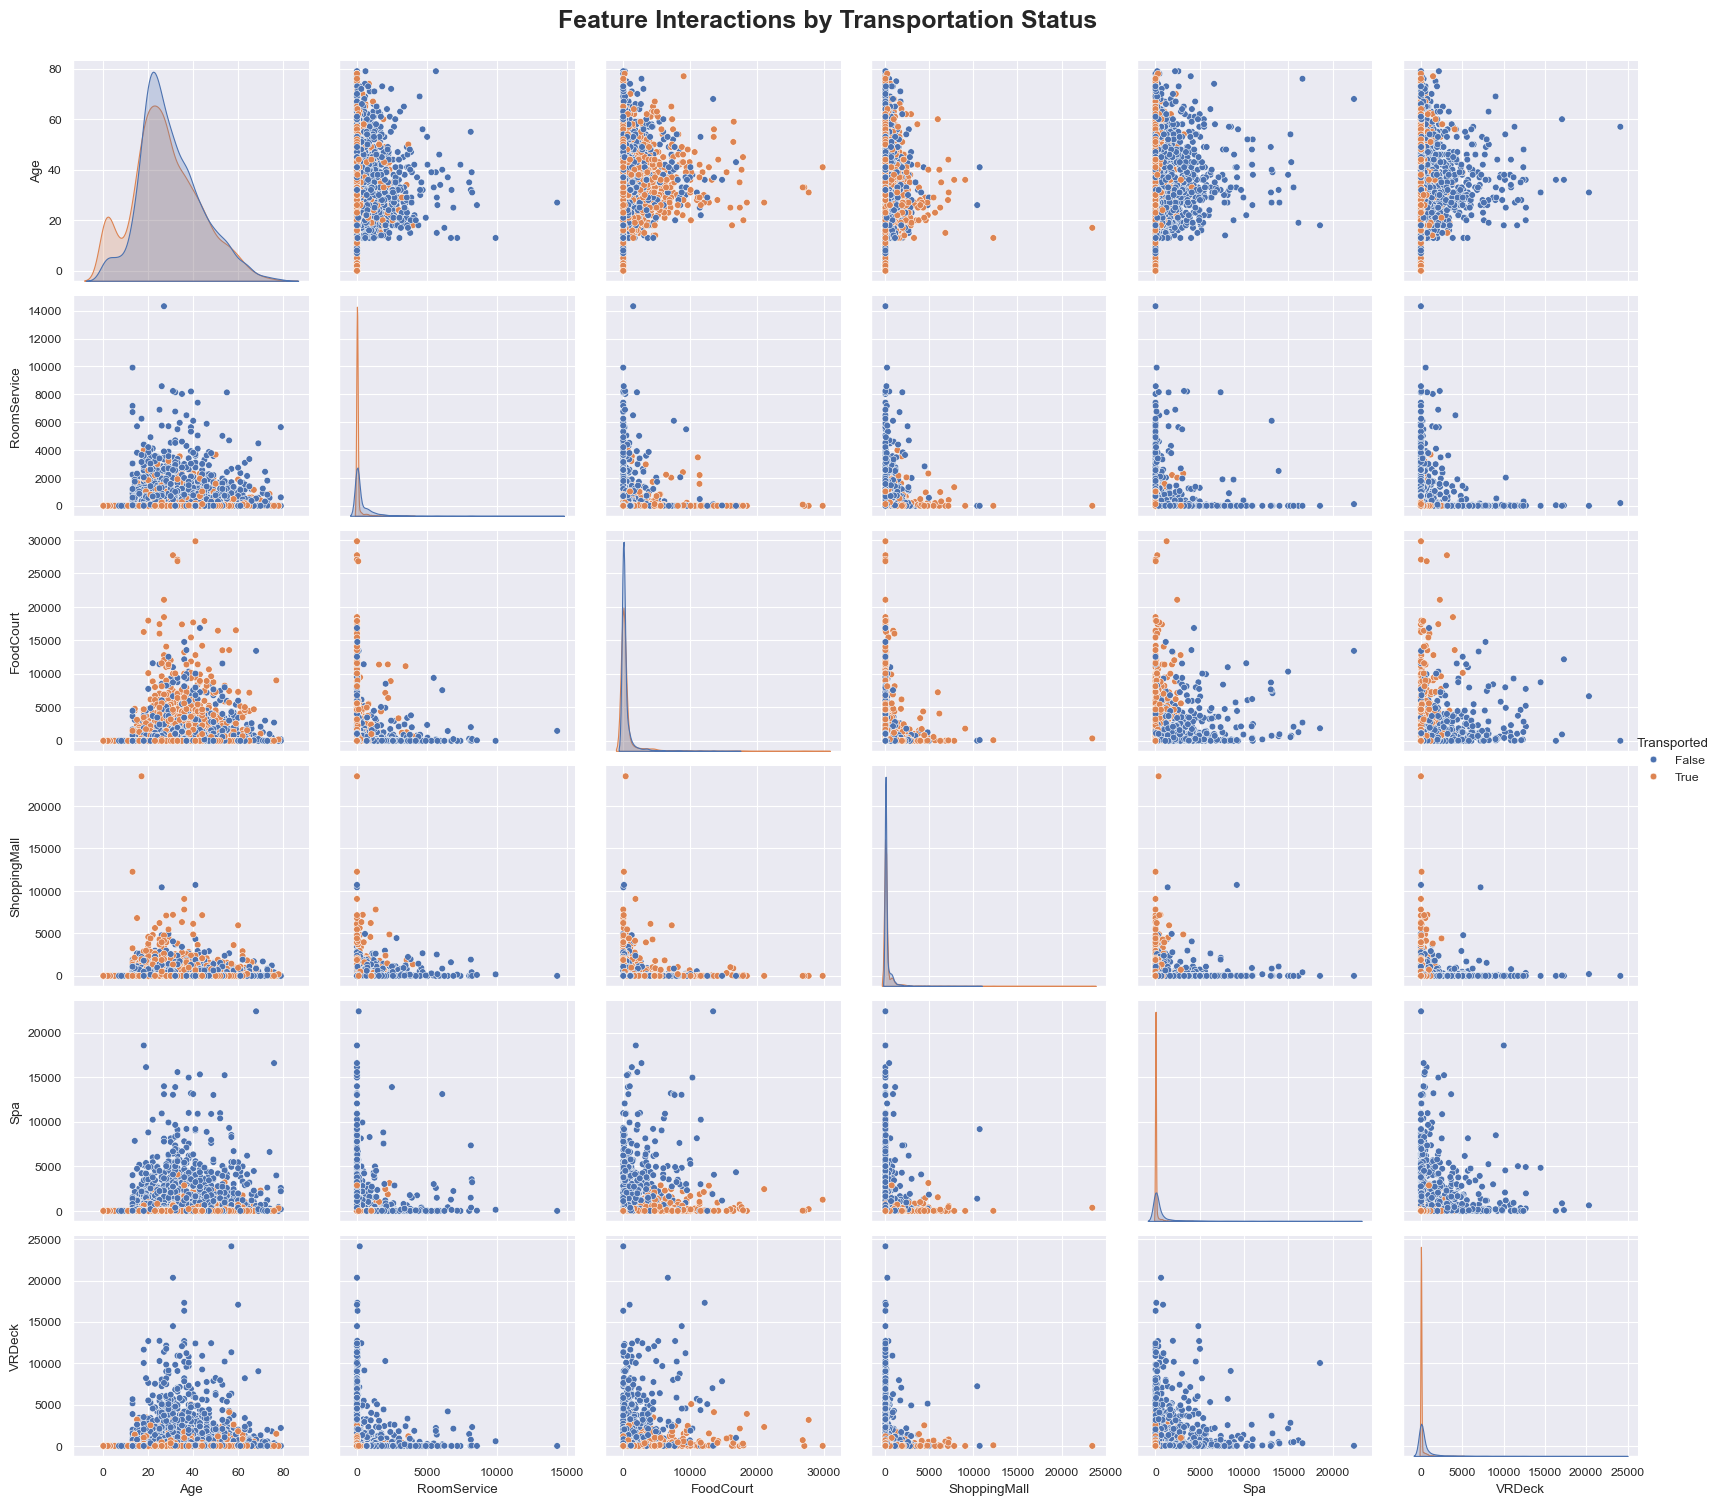

In [ ]:
# pairplot for numberical features by transported
g = sns.pairplot(data=train_data, vars=numerical_features, hue="Transported")
# Move legend outside the plot
g._legend.remove()  # type: ignore # Remove the default legend
g.add_legend(title="Transported",
             bbox_to_anchor=(1, 0.5),  # Position outside plot area
             loc="center left")
# add overall title to the figure
plt.suptitle("Feature Interactions by Transportation Status",
             fontsize=18, fontweight="bold", y=1)
plt.tight_layout()
# saving the plot
plt.savefig(os.path.join(image_save_path,
            "Feature Interactions by Transportation Status.png"),
            bbox_inches="tight")
plt.show()

**Feature Relationships & Patterns:**
1. **Age Distribution & Relationships:**
    - Age shows a normal distribution (diagonal histogram)
    - Age has weak correlations with all spending features
    - Age shows minimal separation between transported (blue) and non-transported (orange) passengers
    - Confirms age is not a strong predictor

2. **Spending Feature Patterns:**
    - All spending features (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) show highly   right-skewed distributions
    - Most passengers spend 0-2000, with extreme outliers spending 10k-30k+
    - Strong positive correlations between all spending features - passengers who spend on one amenity tend to spend on others

3. **Class Separation:**
    - Excellent class separation visible in all scatter plots
    - Orange points (False/not transported) cluster in higher spending regions
    - Blue points (True/transported) concentrate near zero spending across all features
    - The separation is so clear it suggests these will be highly predictive features

4. **Feature Interactions:**
    - Multicollinearity evident among spending features - they move together
    - Create composite spending variables or using dimensionality reduction
    - The spending patterns suggest different passenger behavioral profiles

In [31]:
# fig = px.treemap(data_frame=train_data.dropna(), path=[
#     "Transported", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], color="Age")
# fig.show()

##### Composite Spending Variable

In [32]:
# Define list of spending-related features
spending_columns = ['RoomService', 'FoodCourt',
                    'ShoppingMall', 'Spa', 'VRDeck']

# Add new features to both train and test sets
for df in [train_data, test_data]:
    df['TotalSpend'] = df[spending_columns].sum(axis=1)
    df['NoSpendFlag'] = (df['TotalSpend'] == 0).astype(int)

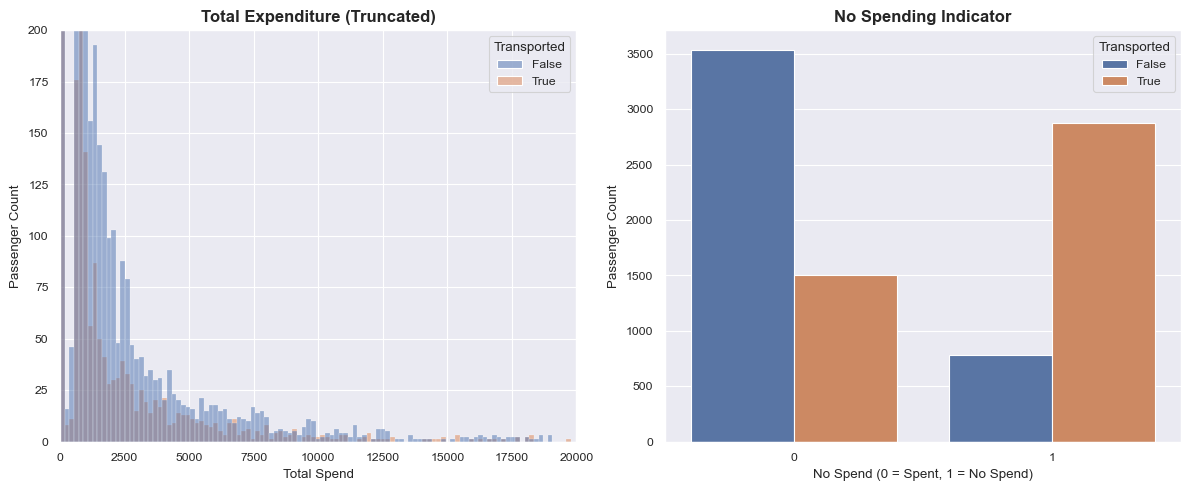

In [33]:
# defining the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Distribution of Total Spend
sns.histplot(
    data=train_data,
    x='TotalSpend',
    hue='Transported',
    bins=200,
    ax=axes[0]
)
axes[0].set_title('Total Expenditure (Truncated)',
                  fontsize=12, fontweight="bold")
axes[0].set_xlim(0, 20000)
axes[0].set_ylim(0, 200)
axes[0].set_xlabel("Total Spend")
axes[0].set_ylabel("Passenger Count")

# Right: Binary Spending Indicator
sns.countplot(
    data=train_data,
    x='NoSpendFlag',
    hue='Transported',
    ax=axes[1]
)
axes[1].set_title('No Spending Indicator', fontsize=12, fontweight="bold")
axes[1].set_xlabel("No Spend (0 = Spent, 1 = No Spend)")
axes[1].set_ylabel("Passenger Count")

plt.tight_layout()
plt.savefig(os.path.join(image_save_path,
                         "Total Expenditure vs No spending indicator.png"),
            bbox_inches="tight")
plt.show()

**1. Total Expenditure Distribution (Left Plot):**
- The distribution shows a natural spending threshold around 2,500
- Very few transported passengers spend above this threshold
- Non-transported passengers show much more varied spending patterns
- Extreme high spenders (>10,000) are almost exclusively non-transported

**2. No Spending Indicator (Right Plot):**
- Non-transported passengers mostly spend money (70%), while transported passengers mostly don't spend (78%)
- If a passenger spends$0, they have a 78% chance of being transported
- Passengers who spend money are 3.6 times more likely to not get transported

##### Assign Age into Groups

In [34]:
# assign age groups to both train and test sets
train_data = assign_age_group(train_data)
test_data = assign_age_group(test_data)

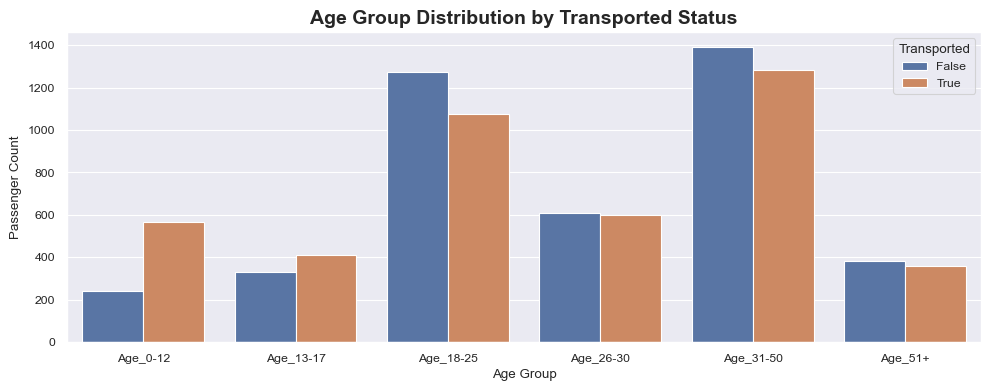

In [35]:
plt.figure(figsize=(10, 4))

sns.countplot(
    data=train_data,
    x='AgeGroup',
    hue='Transported',
    order=['Age_0-12', 'Age_13-17', 'Age_18-25',
           'Age_26-30', 'Age_31-50', 'Age_51+']
)

plt.title('Age Group Distribution by Transported Status',
          fontsize=14, fontweight="bold")
plt.xlabel('Age Group')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.savefig(os.path.join(image_save_path,
                         "Age Group Distribution by Transported Status.png"),
            bbox_inches="tight")
plt.show()

**1. Children Are More Likely to be Transported:**
- Age 0-12 group shows 70% transported vs 30% not transported - the strongest bias toward transportation.

**2. Young Adults Favor Staying on Ship**
- Age 18-25 group has more non-transported passengers (1,300 vs 1,050), suggesting they prefer ship amenities.

**3. Middle-Aged Groups Show Balanced Patterns**
- Ages 26-30 and 31-50 have nearly equal transportation rates, making age less predictive for these groups.

**4. Seniors Have Slight Transportation Preference**
- Age 51+ group shows slightly more transported passengers, but the difference is minimal compared to children.

##### Correlation Plot

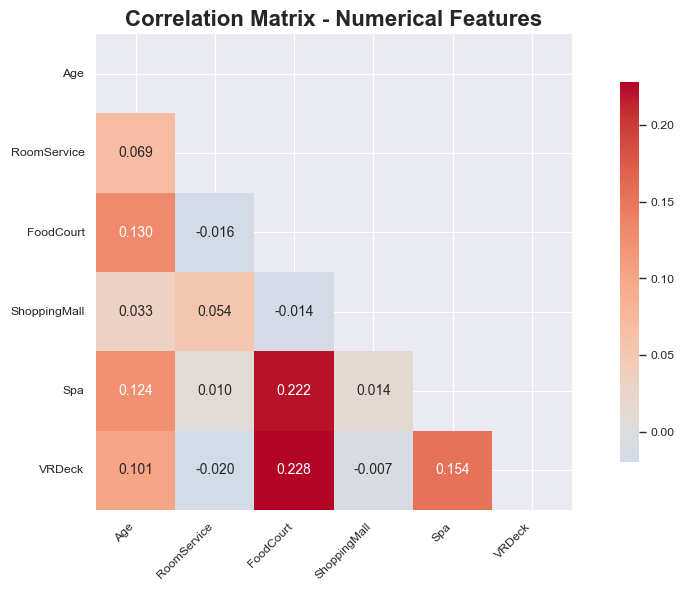

In [ ]:
# correlation matrix for default numerical features
correlation_matrix_default_features = correlation_matrix_visualise(
    train_data, numerical_features, "Correlation Matrix - Numerical Features")

**Observations:**

**1. Weak Connections Between Spending**
- People who spend on one thing don't always spend on others - the connections are weak.

**2. Age Doesn't Matter for Spending**
- Older or younger passengers don't spend more or less money on amenities.

**3. Shopping and VR Are Most Related**
- People who shop are most likely to also use VR - but even this connection is weak.

**4. Each Feature Is Different**
- All features are independent enough to be useful separately in predictions.

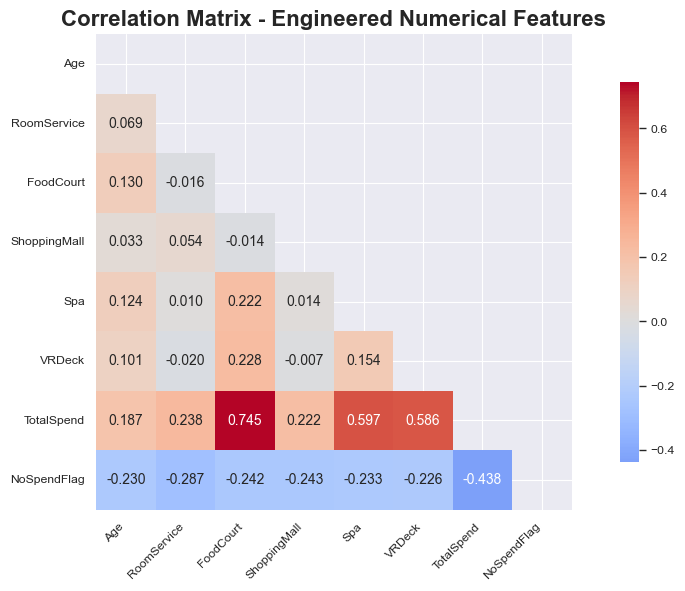

In [47]:
# correlation matrix for engineered numerical features
correlation_matrix_engineered_features = correlation_matrix_visualise(
    train_data, train_data.select_dtypes(include=[np.number]).columns.tolist(), "Correlation Matrix - Engineered Numerical Features")

#### Categorical Features Analysis

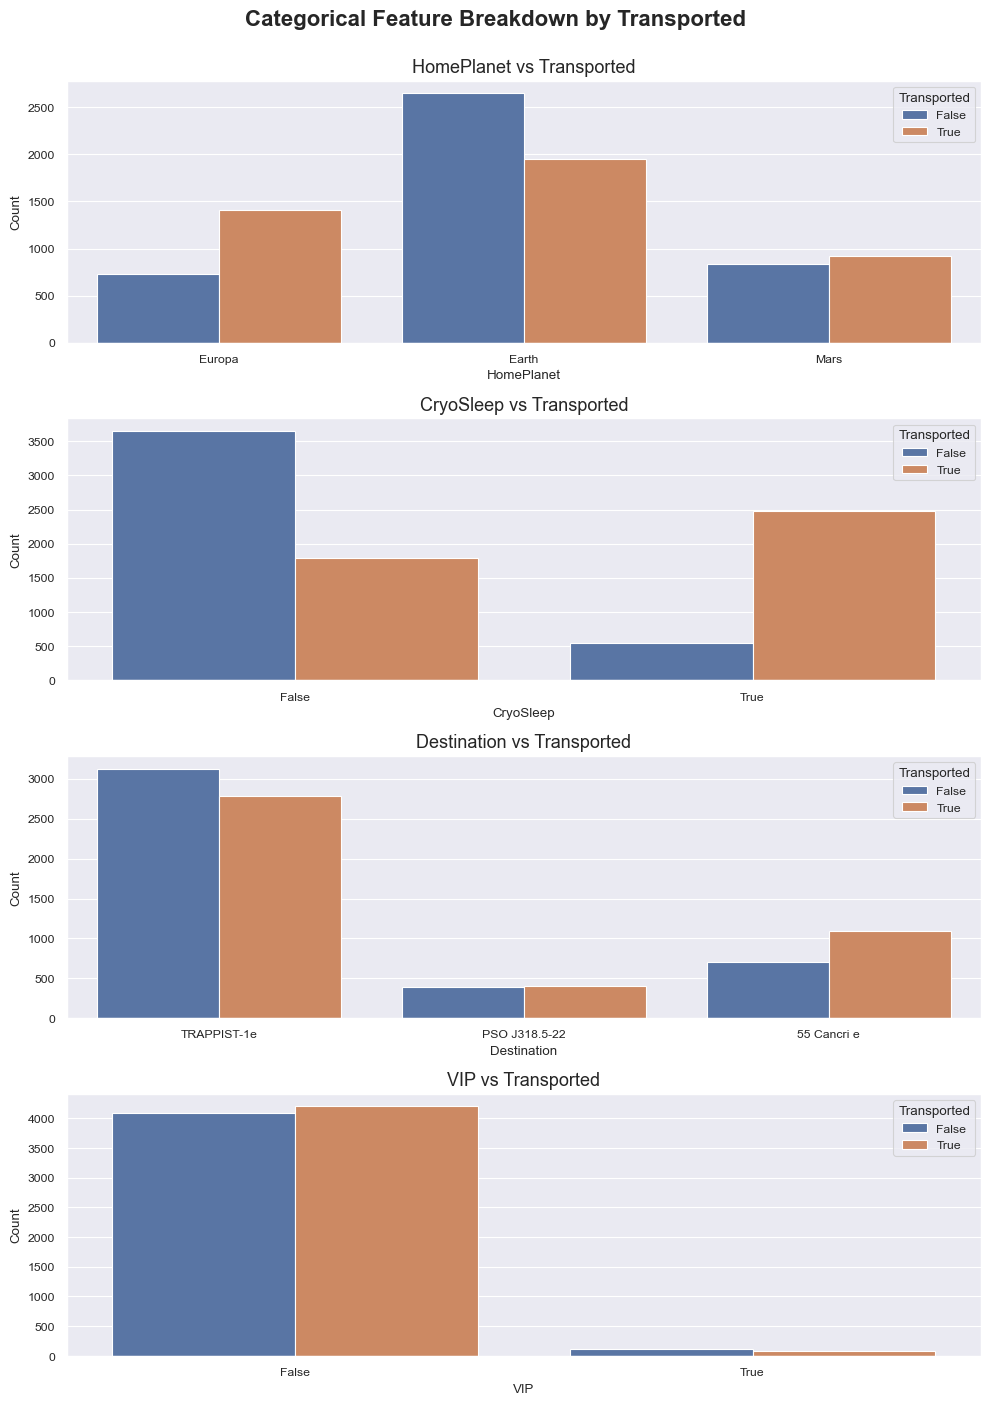

In [37]:
# Setup figure and axes
fig, axes = plt.subplots(
    nrows=len(categorical_features), ncols=1, figsize=(10, 14))
fig.suptitle("Categorical Feature Breakdown by Transported",
             fontsize=16, fontweight="bold", y=1)

# Plot each feature
for idx, col in enumerate(categorical_features):
    sns.countplot(
        data=train_data,
        x=col,
        hue='Transported',
        ax=axes[idx],
    )
    axes[idx].set_title(f"{col} vs Transported", fontsize=13)
    axes[idx].set_ylabel("Count")
    axes[idx].set_xlabel(col)
    axes[idx].legend(title='Transported', loc='upper right')

plt.tight_layout()
plt.savefig(os.path.join(image_save_path,
                         "Categorical Feature Breakdown by Transported.png"),
            bbox_inches="tight")
plt.show()

#### Extracting Group Size

In [ ]:
# extract group identifier from PassengerID
for df in [train_data, test_data]:
    df["GroupID"] = df["PassengerId"].apply(
        lambda grp_id: grp_id.split("_")[0]).astype(int)

### Precossing

#### Handling Missing Values

##### Handling Outliers

### Training

#### XAI